## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

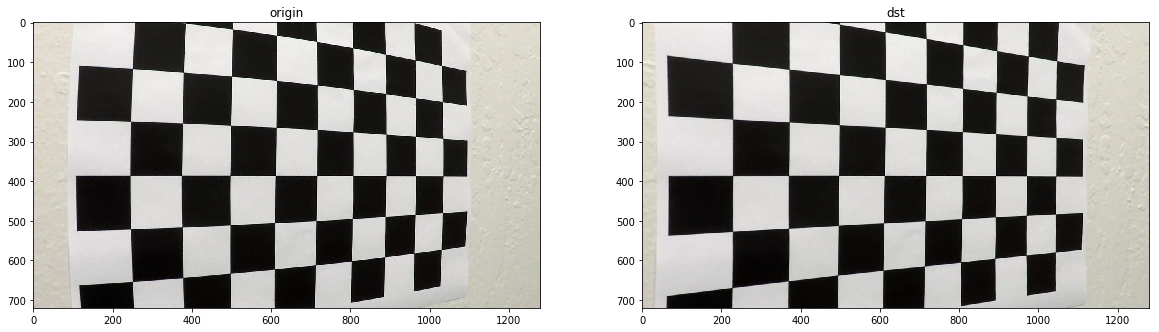

In [4]:
# import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# plt.figure(figsize=(20,10))
# for idx, fname in enumerate(images):
#     img = mpimg.imread(fname)
    
#     plt.subplot(len(images)/4, 4, idx+1)
#     plt.imshow(img)
#     plt.axis('off')

def cal_undistort(img, objpoints, imgpoints):
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)


# cv2.destroyAllWindows()


plt.figure(figsize=(20,10))
img = mpimg.imread('../camera_cal/calibration5.jpg')
dst = cal_undistort(img, objpoints, imgpoints)

plt.subplot(121)
plt.title('origin')
plt.imshow(img)

plt.subplot(122)
plt.title('dst')
plt.imshow(dst)

## Pipeline

### Perspective Transform

array([[[ 94,  86,  85],
        [ 94,  86,  85],
        [ 94,  85,  85],
        ..., 
        [ 84,  83,  91],
        [ 84,  83,  91],
        [ 84,  83,  91]],

       [[ 94,  86,  85],
        [ 94,  86,  85],
        [ 94,  86,  85],
        ..., 
        [ 84,  83,  91],
        [ 84,  83,  91],
        [ 84,  83,  91]],

       [[ 94,  86,  84],
        [ 94,  86,  85],
        [ 94,  86,  85],
        ..., 
        [ 84,  83,  91],
        [ 84,  83,  91],
        [ 84,  83,  92]],

       ..., 
       [[ 91,  81,  92],
        [ 90,  80,  91],
        [ 91,  81,  92],
        ..., 
        [ 68,  60,  71],
        [ 70,  62,  73],
        [ 72,  63,  74]],

       [[ 95,  82,  98],
        [ 95,  85,  96],
        [ 95,  85,  96],
        ..., 
        [ 88,  76,  88],
        [ 89,  77,  89],
        [ 91,  79,  91]],

       [[ 96,  83,  99],
        [ 96,  84, 100],
        [ 97,  84, 101],
        ..., 
        [ 97,  79,  91],
        [ 96,  78,  90],
        [ 94,  76,

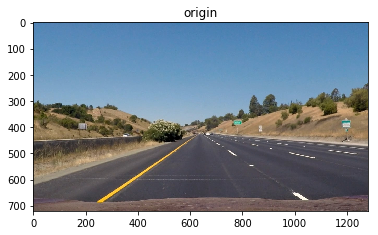

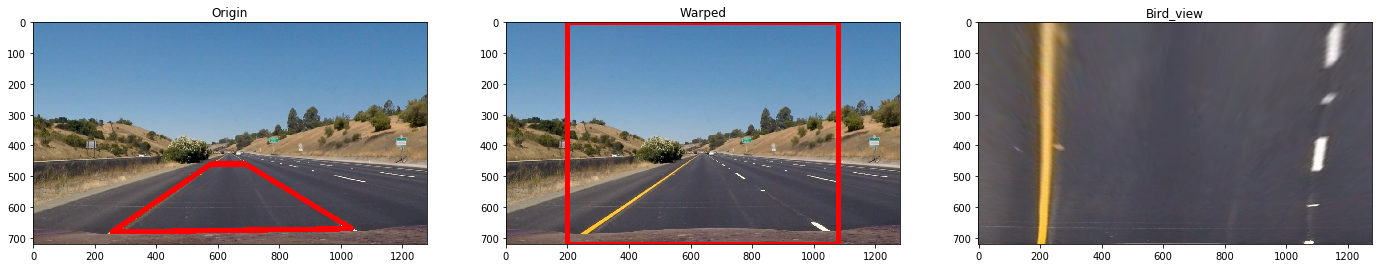

In [21]:


def unwarp(img, src, dst):
    img_size = img.shape[1::-1]
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size)

    return warped, M

# %matplotlib qt

timg = mpimg.imread('../test_images/straight_lines1.jpg')

plt.title('origin')
plt.imshow(timg)

def perspective(img):
    
    img_size = img.shape[1::-1]
#     print(img_size[0])
    src = np.float32([[578,460],[690,460],[1035,670],[257,680]])
    offset = 200
    dst = np.float32([[offset,0],[img_size[0]-offset,0],[img_size[0]-offset,img_size[1]],[offset,img_size[1]]])
    
    
    src_img = img.copy()
    src_pts = src.reshape((-1, 1, 2)).astype("int32")
    cv2.polylines(src_img,[src_pts],True,(255,0,0),thickness = 15)
    
    dst_img = img.copy()
    dst_pts = dst.reshape((-1, 1, 2)).astype("int32")
    cv2.polylines(dst_img,[dst_pts],True,(255,0,0),thickness = 15)
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size)
    
    
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,9))
    ax1.imshow(src_img)
    ax1.set_title('Origin')
    ax2.imshow(dst_img)
    ax2.set_title('Warped')
    ax3.imshow(warped)
    ax3.set_title('Bird_view')
    
    return warped
    
perspective(timg)
